In [414]:

import pandas as pd
import numpy as np
import warnings



import re
import os
import json

import plotly.express as px

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import shap
from catboost import CatBoostClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import GridSearchCV

import optuna.visualization as vis

import xgboost as xgb
import lightgbm as lgb
warnings.filterwarnings("ignore")

In [423]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('tested.csv')
combine = [train_df, test_df]

In [410]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


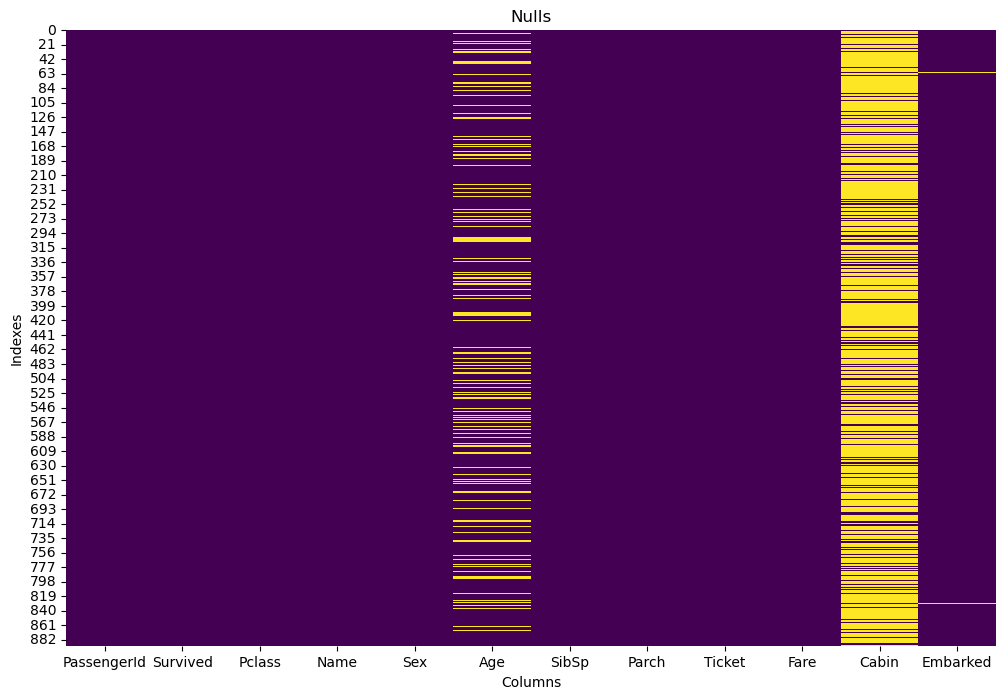

In [411]:

missing_data = train_df.isnull()
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis', cbar_kws={'label': 'Missing Data'})
plt.title('Nulls')
plt.xlabel('Columns')
plt.ylabel('Indexes')
plt.show()

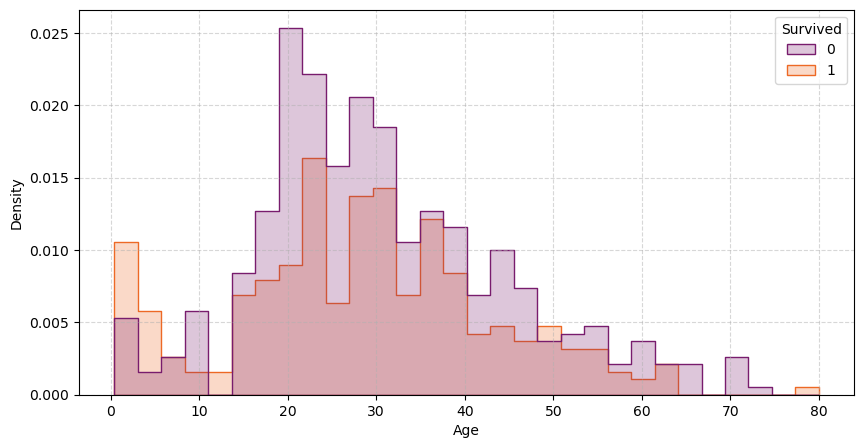

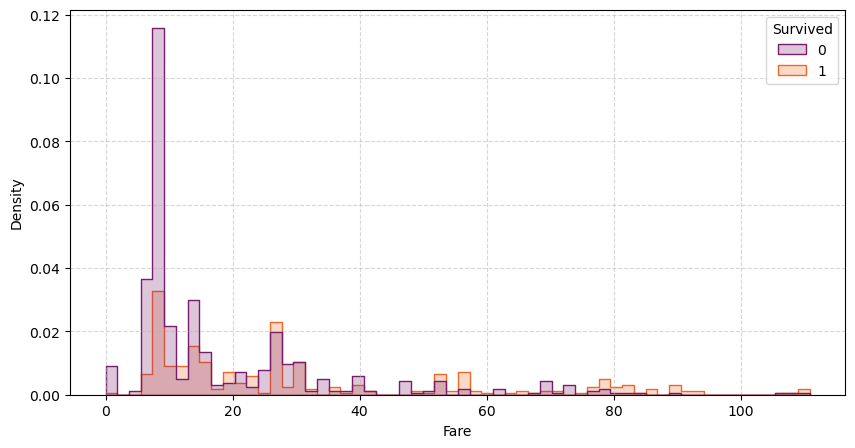

In [412]:
plt.figure(figsize=(10, 5))

sns.histplot(data=train_df, x='Age', hue='Survived', kde=False, bins=30, 
             palette='inferno', element='step', stat='density', )
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=train_df[train_df.Fare < np.percentile(train_df.Fare, 95)], x='Fare', hue='Survived', kde=False, bins=60, 
             palette='inferno', element='step', stat='density', )
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [457]:
for dataset in combine:
    gender_mapping = {'male':0,
                  'female':1}

    dataset['Sex_num'] = dataset['Sex'].apply(lambda x : gender_mapping.get(x)) 

In [ ]:
## filling ages 
median_age = pd.concat([train_df, test_df], axis = 0).groupby('Title')['Age'].median()


for dataset in combine:
median_age = entire_df.groupby('Title')['Age'].median()
def fill_age(title, age):
    if np.isnan(age): 
        return median_age.loc[title]
    else:
        return age

    
# Replace nan age with median age based on Title
entire_df['Age'] = entire_df.apply(lambda x : fill_age(x['Title'], x['Age']), axis=1)   
    

Text(0.5, 1.0, 'Age Distribution')

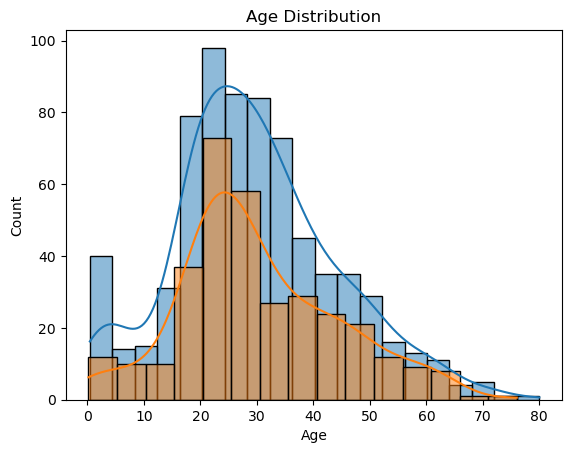

In [ ]:
## before
sns.histplot(data=train_df['Age'], kde=True)
plt.title('Age Distribution')


sns.histplot(data=test_df['Age'], kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Age Distribution')

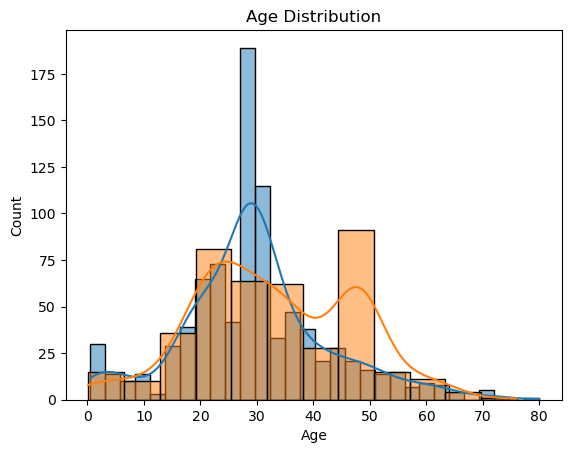

In [461]:
## after
sns.histplot(data=train_df['Age'], kde=True)
plt.title('Age Distribution')


sns.histplot(data=test_df['Age'], kde=True)
plt.title('Age Distribution')

In [462]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,32.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [377]:
for dataset in combine:
    dataset['Title'] = dataset['Name']
    # Cleaning name and extracting Title
    for name_string in dataset['Name']:
        dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=True)

    # Replacing rare titles with more common ones
    mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
            'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
    dataset.replace({'Title': mapping}, inplace=True)
    titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
    for title in titles:
        age_to_impute = dataset.groupby('Title')['Age'].median()[titles.index(title)]
        dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == title), 'Age'] = age_to_impute

In [272]:
train_df['Name'].map(lambda x: re.compile("^[^,]+").search(x).group()).value_counts()

Name
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

In [350]:
for dataset in combine:
    dataset['Surname'] = dataset['Name'].map(lambda x: re.compile("^[^,]+").search(x).group())

In [351]:
for dataset in combine:
    def categorize_family(row):
        if row['Age'] < 18 and row['Age'] > 3 and row['Parch'] > 0:
            return 'Child with Parents'
        if row['Age'] < 18 and row['Age'] > 3 and row['Parch'] == 0:
            return 'Child wo Parents'
        elif row['Age'] >= 18 and row['Parch'] > 0:
            return 'Parent'
        elif row['Age'] >= 18 and row['Parch'] == 0 and row['SibSp'] > 0:
            return 'Adult with family wo children'
        elif row['Age'] >= 18 and row['Parch'] == 0 and row['SibSp'] == 0:
            return 'Adult alone'
        elif row['Age'] >= 18 and row['Parch'] > 0 and row['SibSp'] == 0:
            return 'Adult with children wo family'
        elif row['Age'] >= 18 and row['Parch'] > 0 and row['SibSp'] > 0:
            return 'PAdult with Family and Children'
        elif row['Age'] <= 3:
            return 'Orphan'
        else:
            return 'Unknown'

    dataset['Pass_type'] = dataset.apply(categorize_family, axis=1)


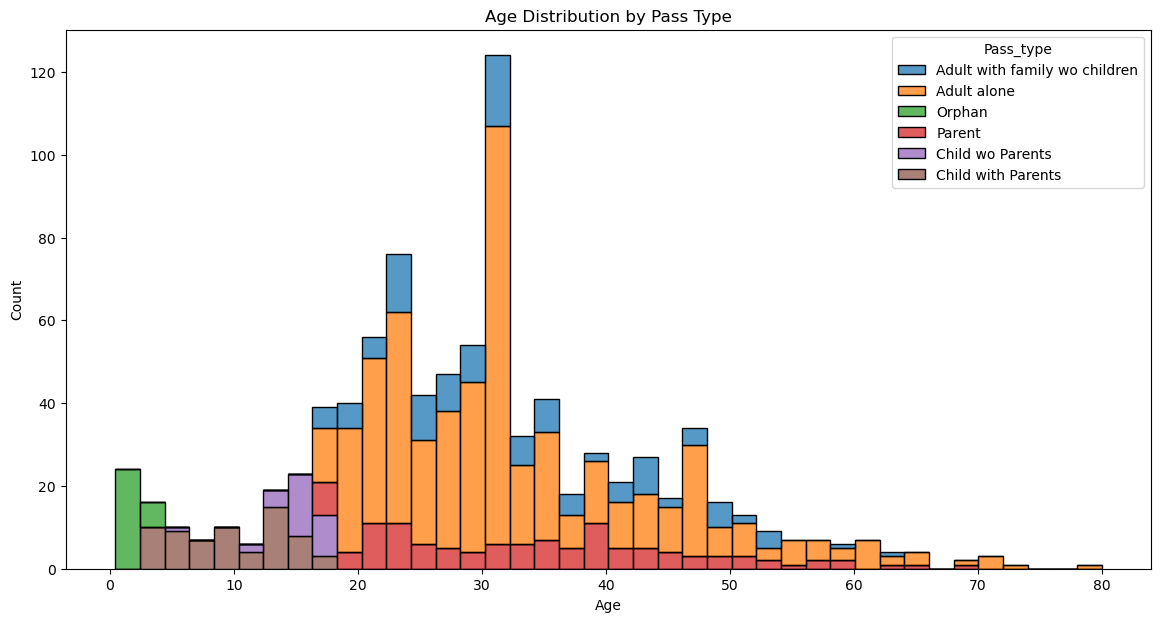

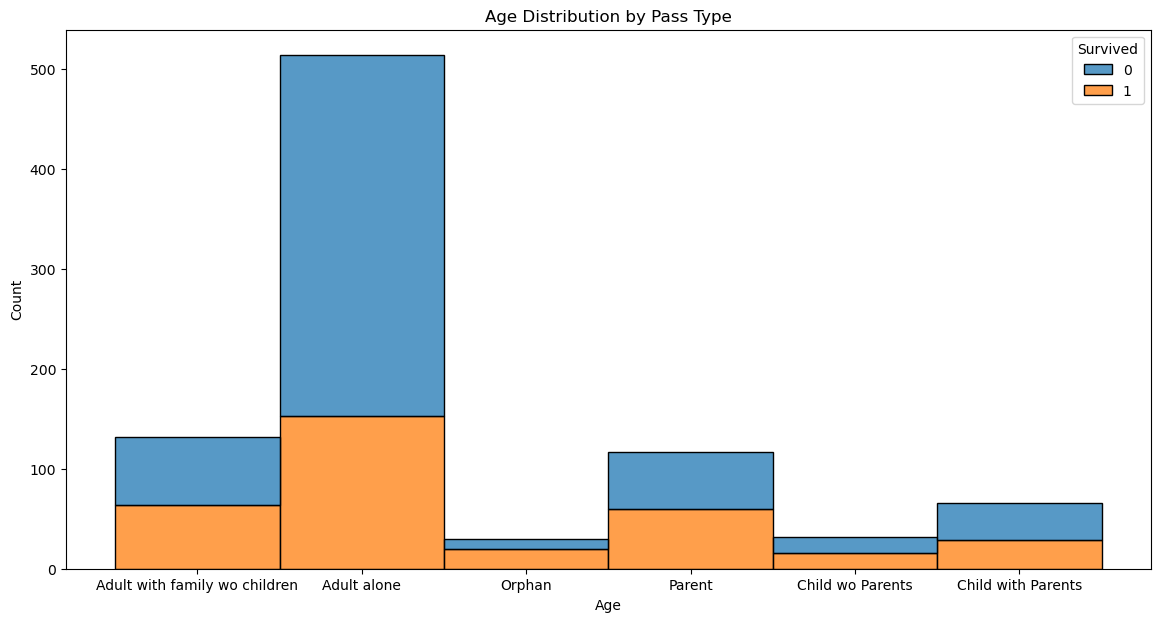

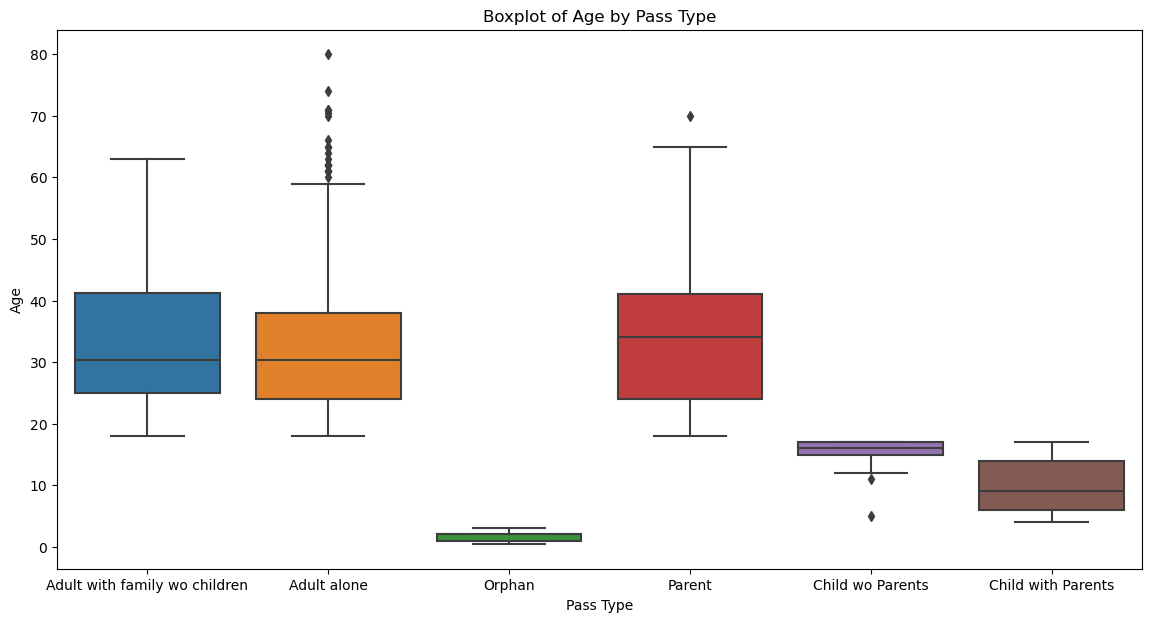

In [275]:
plt.figure(figsize=(14, 7))
sns.histplot(data=train_df, x='Age', hue='Pass_type',  bins=40, multiple="stack")

plt.title("Age Distribution by Pass Type")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(14, 7))
sns.histplot(data=train_df, x='Pass_type', hue='Survived',  bins=40, multiple="stack")
plt.title("Age Distribution by Pass Type")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='Pass_type', y='Age', data=train_df)

plt.title("Boxplot of Age by Pass Type")
plt.xlabel("Pass Type")
plt.ylabel("Age")
plt.show()

In [86]:
train_df[train_df.Name.str.contains('Caldwell')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pass_type,Surname
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0,NaN,S,Orphan,Caldwell
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.00,1,1,248738,29.0,NaN,S,Parent,Caldwell


In [352]:
for dataset in combine:
    dataset['parent_orphan'] = 0
    

    for idx, row in dataset[dataset['Pass_type'] == 'Parent'].iterrows():
        matching_orphan = dataset[(dataset['Pass_type'] == 'Orphan') & 
                                  (dataset['Surname'] == row['Surname']) & 
                                  (dataset['Fare'] == row['Fare'])]
        
        ## there is orphan
        if not matching_orphan.empty:
            dataset.at[idx, 'parent_orphan'] = 1

In [93]:
train_df[train_df.Name.str.contains('Allison')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pass_type,Surname,parent_orphan
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,Orphan,Allison,0
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,Orphan,Allison,0
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,Parent,Allison,1


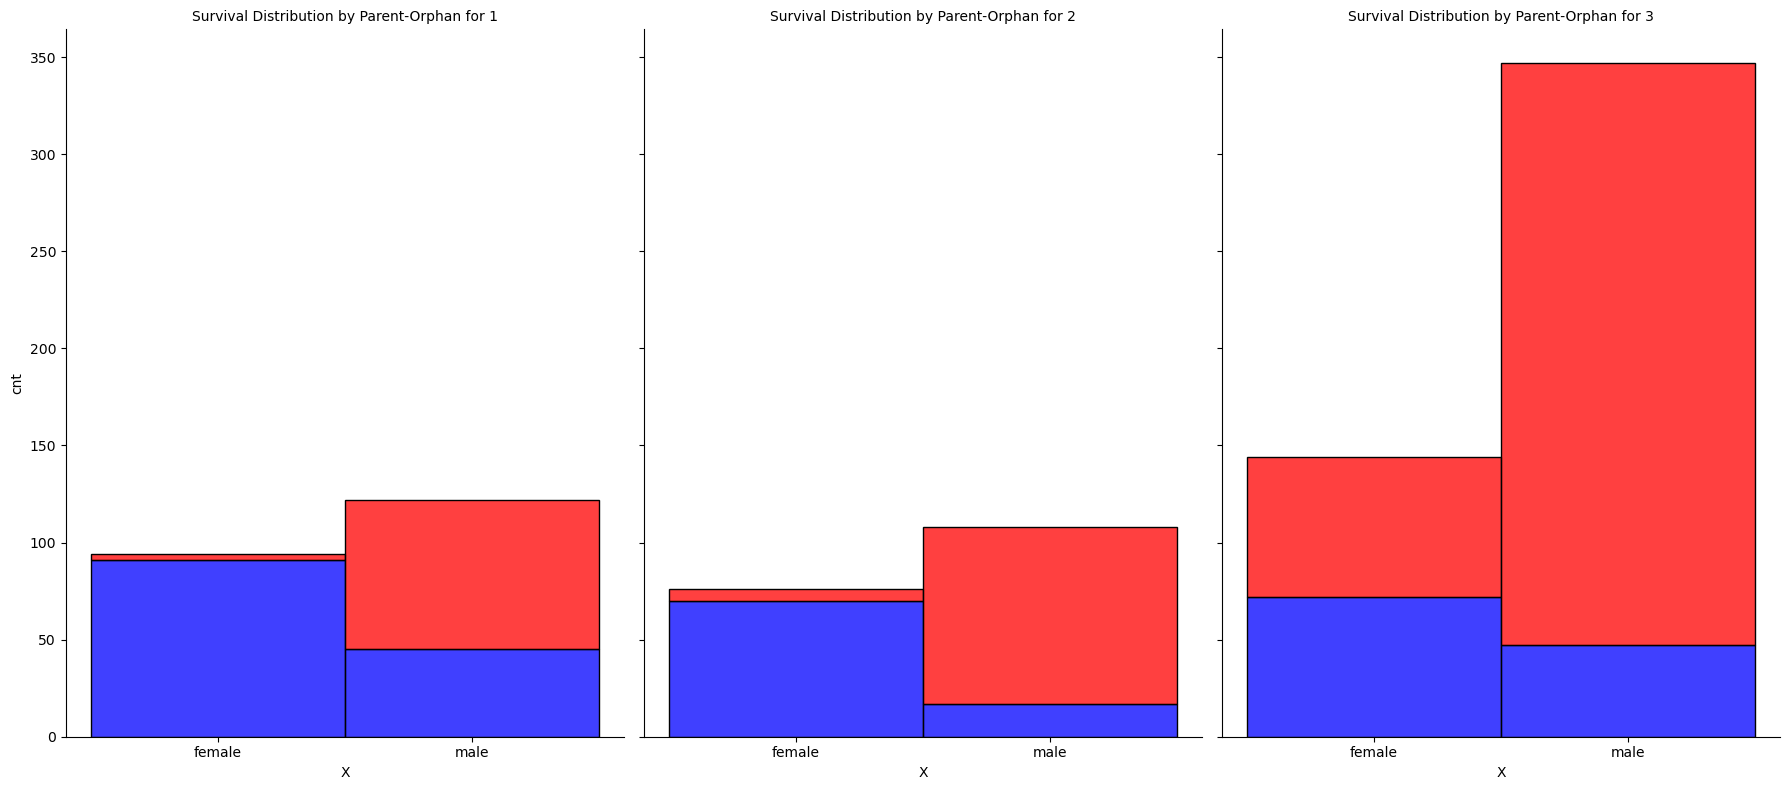

In [129]:

g = sns.FacetGrid(train_df, col='Pclass', height=8, aspect=0.75)


g.map_dataframe(sns.histplot, x='Sex', bins=2, hue='Survived', multiple="stack", kde=False, discrete=True
                ,palette={0: 'red', 1: 'blue'})
g.set_axis_labels('X', 'cnt')
g.set_titles('Survival Distribution by Parent-Orphan for {col_name}')
plt.show()

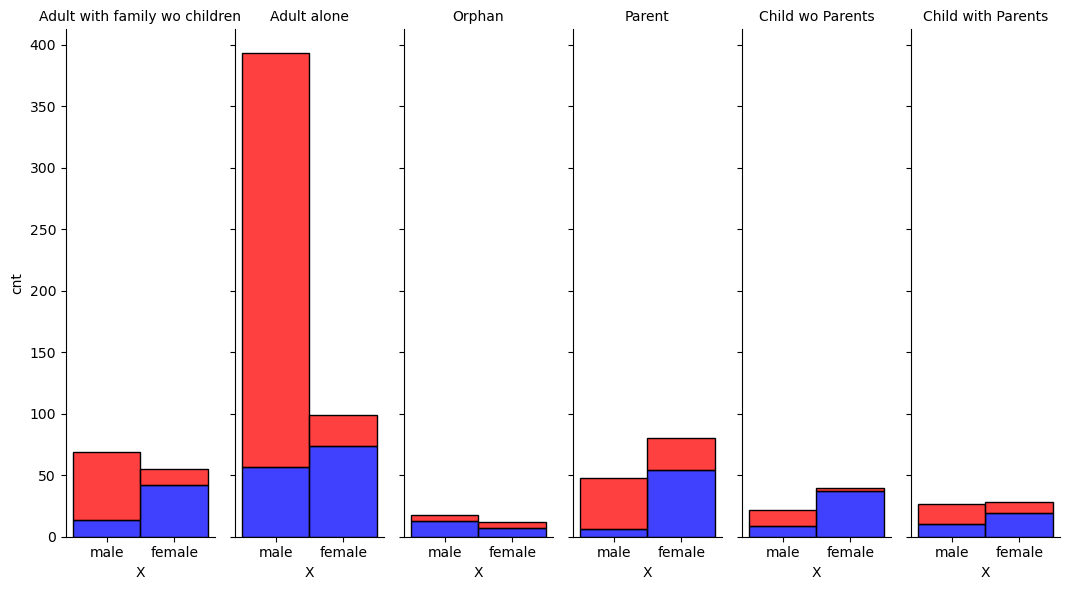

In [139]:

g = sns.FacetGrid(train_df, col='Pass_type', height=6, aspect=0.3)


g.map_dataframe(sns.histplot, x='Sex', bins=2, hue='Survived', multiple="stack", kde=False, discrete=True
                ,palette={0: 'red', 1: 'blue'})
g.set_axis_labels('X', 'cnt')
g.set_titles('{col_name}')
plt.show()

In [353]:

# deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}


for dataset in combine:

    # assign deck num based on scheme of ship (fill with pcclass distr)
    # dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    # dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    # dataset['Deck'] = dataset['Deck'].map(deck)
    # mode_by_pclass = dataset.groupby('Pclass')['Deck'].apply(lambda x: x.mode()[0] if not x.mode().empty else 0)
    # dataset['Deck'] = dataset.apply(
    #     lambda row: mode_by_pclass[row['Pclass']] if pd.isnull(row['Deck']) else row['Deck'], axis=1
    # )
    # dataset['Deck'] = dataset['Deck'].astype(int)

    # Title encoding
    dataset['Title'] = dataset.Name.str.extract(r' ([A-Za-z]+)\.', expand=False)
    dataset.Title = dataset.Title.replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
                                            'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset.Title = dataset.Title.replace('Mlle', 'Miss')
    dataset.Title = dataset.Title.replace('Ms', 'Miss')
    dataset.Title = dataset.Title.replace('Mme', 'Mrs')
    
    # Title encoding
    encoder_title = OneHotEncoder(sparse_output=False, drop='first')
    title_encoded = encoder_title.fit_transform(dataset[['Title']])
    title_encoded_df = pd.DataFrame(title_encoded, columns=encoder_title.get_feature_names_out(['Title'])).astype(int)
    # add title columns
    for col in title_encoded_df.columns:
        dataset[col] = title_encoded_df[col]

    # Embarked encoding
    # there are 2 nulls
    most_frequent_embarked = dataset['Embarked'].mode()[0]
    dataset['Embarked'].fillna(most_frequent_embarked, inplace=True)
    
    encoder_embarked = OneHotEncoder(sparse_output=False, drop='first')
    embarked_encoded = encoder_embarked.fit_transform(dataset[['Embarked']])
    embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder_embarked.get_feature_names_out(['Embarked'])).astype(int)

    for col in embarked_encoded_df.columns:
        dataset[col] = embarked_encoded_df[col]

    # Sex encoding
    encoder_Sex = OneHotEncoder(sparse_output=False, drop='first')
    sex_encoded = encoder_Sex.fit_transform(dataset[['Sex']])
    sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder_Sex.get_feature_names_out(['Sex'])).astype(int)

    for col in sex_encoded_df.columns:
        dataset[col] = sex_encoded_df[col]
        
    # Pass_type encoding
    encoder_Pass_type= OneHotEncoder(sparse_output=False, drop='first')
    Pass_type_encoded = encoder_Pass_type.fit_transform(dataset[['Pass_type']])
    Pass_type_encoded_df = pd.DataFrame(Pass_type_encoded, columns=encoder_Pass_type.get_feature_names_out(['Pass_type'])).astype(int)

    for col in Pass_type_encoded_df.columns:
        dataset[col] = Pass_type_encoded_df[col]

    # Pclass encoding
    encoder_Pclass = OneHotEncoder(sparse_output=False, drop='first')
    Pclass_encoded = encoder_Pclass.fit_transform(dataset[['Pclass']])
    Pclass_encoded_df = pd.DataFrame(Pclass_encoded, columns=encoder_Pclass.get_feature_names_out(['Pclass'])).astype(int)

    for col in Pclass_encoded_df.columns:
        dataset[col] = Pclass_encoded_df[col]



<Axes: >

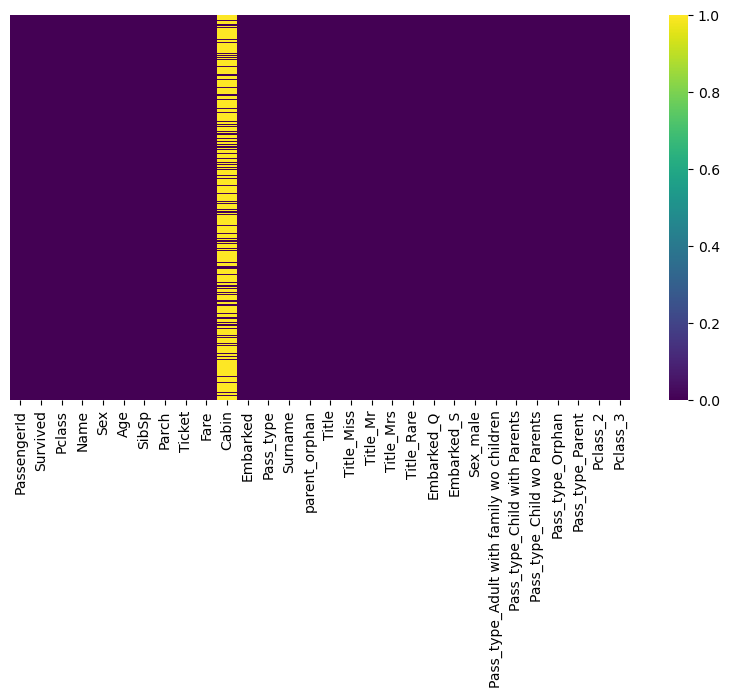

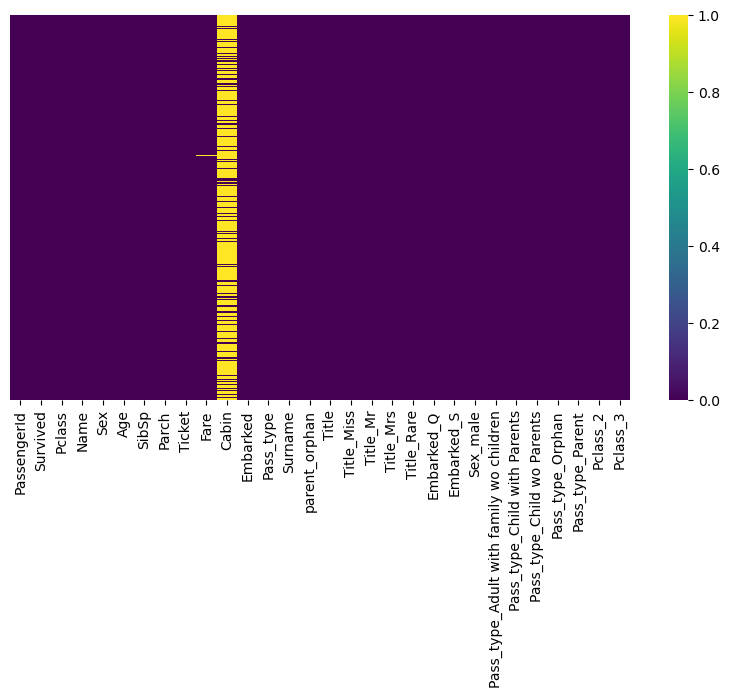

In [142]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(),yticklabels=False,cmap=('viridis'))
plt.figure(figsize=(10, 5))
sns.heatmap(test_df.isnull(),yticklabels=False,cmap=('viridis'))

In [354]:

for dataset in combine:
    median_by_deck = dataset.groupby('Pclass')['Fare'].median()
    dataset['Fare'] = dataset.apply(
        lambda row: median_by_deck[row['Pclass']] if pd.isnull(row['Fare']) else row['Fare'], axis=1
    )


<Axes: >

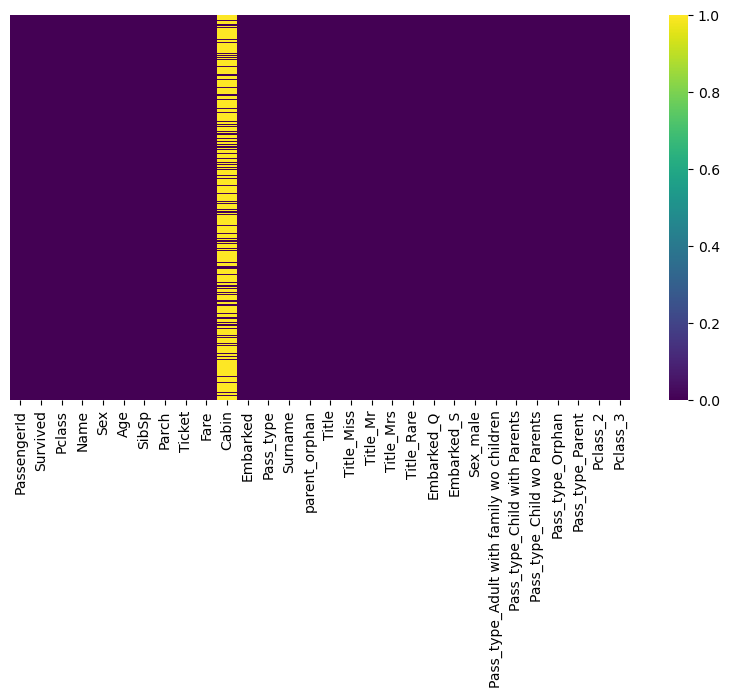

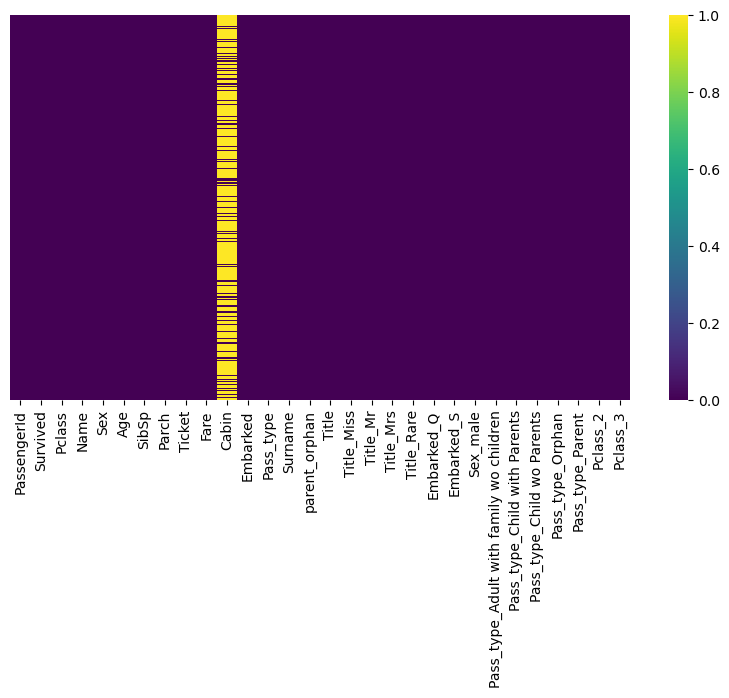

In [144]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(),yticklabels=False,cmap=('viridis'))
plt.figure(figsize=(10, 5))
sns.heatmap(test_df.isnull(),yticklabels=False,cmap=('viridis'))

In [378]:
for dataset in combine:
    dataset['Last_Name'] = dataset['Name'].apply(lambda x: str.split(x, ",")[0])

    DEFAULT_SURVIVAL_VALUE = 0.5
    dataset['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

    for grp, grp_df in dataset[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                            'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
        
        if (len(grp_df) != 1):

            for ind, row in grp_df.iterrows():
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 0
                    
    dataset['Family_Size'] = dataset['Parch'] + dataset['SibSp']
    
    
    for _, grp_df in dataset.groupby('Ticket'):
        if (len(grp_df) != 1):
            for ind, row in grp_df.iterrows():
                if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                    smax = grp_df.drop(ind)['Survived'].max()
                    smin = grp_df.drop(ind)['Survived'].min()
                    passID = row['PassengerId']
                    if (smax == 1.0):
                        dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 1
                    elif (smin==0.0):
                        dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 0
                        
    

In [379]:
for dataset in combine:
    
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 5)

    label = LabelEncoder()
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
    dataset['AgeBin'] = pd.qcut(dataset['Age'], 4)

    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    dataset['Sex'].replace(['male','female'],[0,1],inplace=True)
    dataset['Sex'].replace(['male','female'],[0,1],inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = train_df[['FareBin_Code',  'Family_Survival',
              'AgeBin_Code', 'Family_Size',
               'Pclass', 'Sex']]
Y = train_df['Survived']

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)



X_train = X.copy()
Y_train = Y.copy()



In [385]:

X_test = test_df[['FareBin_Code',  'Family_Survival',
              'AgeBin_Code', 'Family_Size',
               'Pclass', 'Sex']]


X_test = std_scaler.transform(X_test)
Y_test = test_df['Survived']




Random Forest:
  Accuracy (Train): 88.66%
  Accuracy (Test): 88.28%
  Log Loss (Train): 0.2567
  Log Loss (Test): 0.4090
--------------------------------------------------
SGD:
  Accuracy (Train): 80.92%
  Accuracy (Test): 95.22%
  Log Loss (Train): 0.5040
  Log Loss (Test): 0.2305
--------------------------------------------------
Linear SVC:
  Accuracy (Train): 83.05%
  Accuracy (Test): 94.74%
  Log Loss (Train): 4.4920
  Log Loss (Test): 1.2928
--------------------------------------------------
KNN:
  Accuracy (Train): 86.20%
  Accuracy (Test): 90.19%
  Log Loss (Train): 0.6237
  Log Loss (Test): 0.5987
--------------------------------------------------
Gaussian Naive Bayes:
  Accuracy (Train): 78.79%
  Accuracy (Test): 84.93%
  Log Loss (Train): 0.4683
  Log Loss (Test): 0.4037
--------------------------------------------------
SVC:
  Accuracy (Train): 84.62%
  Accuracy (Test): 95.45%
  Log Loss (Train): 0.3982
  Log Loss (Test): 0.2423
---------------------------------------------

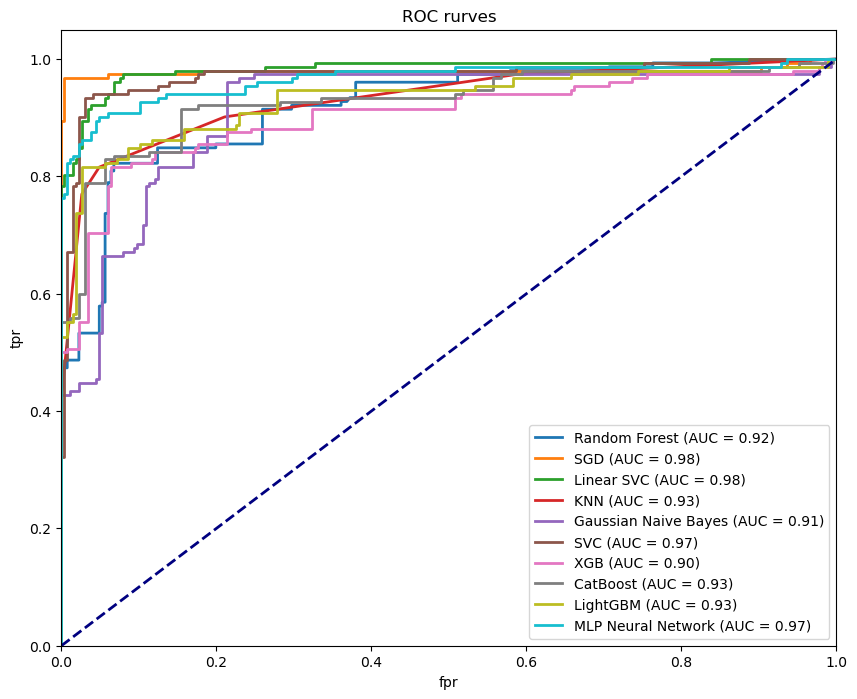

In [386]:
class ModelEvaluator:
    def __init__(self, X_train, Y_train, X_test, Y_test):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.models = [
            ("Random Forest", RandomForestClassifier()),
            ("SGD", SGDClassifier(loss='log')),
            ("Linear SVC", LinearSVC()),
                        ('KNN', KNeighborsClassifier()),
            ("Gaussian Naive Bayes", GaussianNB()),
            ("SVC", SVC(probability=True)),
            ("XGB", xgb.XGBClassifier()),
            ("CatBoost", CatBoostClassifier(loss_function='Logloss', verbose=0)),
            ("LightGBM", lgb.LGBMClassifier()),
            ("MLP Neural Network", MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42))
        ]

    def calculate_log_loss(self, model):
        if hasattr(model, "predict_proba"):
            probas_train = model.predict_proba(self.X_train)
            probas_test = model.predict_proba(self.X_test)
        else:
            probas_train = model.decision_function(self.X_train)
            probas_test = model.decision_function(self.X_test)

        log_loss_train = log_loss(self.Y_train, probas_train)
        log_loss_test = log_loss(self.Y_test, probas_test)
        return log_loss_train, log_loss_test


    def train_and_evaluate_models(self):
        for name, model in self.models:
            model.fit(self.X_train, self.Y_train)
            
            # Accuracy
            acc_train = accuracy_score(self.Y_train, model.predict(self.X_train)) * 100
            acc_test = accuracy_score(self.Y_test, model.predict(self.X_test)) * 100
            
            # Log Loss
            log_loss_train, log_loss_test = self.calculate_log_loss(model)
            
            # Print results
            print(f"{name}:")
            print(f"  Accuracy (Train): {acc_train:.2f}%")
            print(f"  Accuracy (Test): {acc_test:.2f}%")
            print(f"  Log Loss (Train): {log_loss_train:.4f}")
            print(f"  Log Loss (Test): {log_loss_test:.4f}")
            print("-" * 50)
        
    

    def plot_roc_curve(self):
        plt.figure(figsize=(10, 8))

        for name, model in self.models:
            if hasattr(model, "predict_proba"):
                probas_ = model.predict_proba(self.X_test)[:, 1]
            else:
                probas_ = model.decision_function(self.X_test)

            fpr, tpr, _ = roc_curve(self.Y_test, probas_)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

        # random roc to compare
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        plt.title('ROC rurves')
        plt.legend(loc="lower right")
        plt.show()


evaluator = ModelEvaluator(X_train, Y_train, X_test, Y_test)
evaluator.train_and_evaluate_models()
evaluator.plot_roc_curve()

KNeighborsClassifier()

In [392]:

models = [
 ("Random Forest", RandomForestClassifier()),
            ("SGD", SGDClassifier(loss='log')),
            ("Linear SVC", LinearSVC()),
            ('KNN', KNeighborsClassifier()),
            ("Gaussian Naive Bayes", GaussianNB()),
            ("SVC", SVC(probability=True)),
            ("XGB", xgb.XGBClassifier()),
            ("CatBoost", CatBoostClassifier(loss_function='Logloss', verbose=0)),
            ("LightGBM", lgb.LGBMClassifier()),
            ("MLP Neural Network", MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42))
        ]


# Initialize lists to store the metrics
precision_train_list = []
precision_test_list = []
recall_train_list = []
recall_test_list = []
f1_train_list = []
f1_test_list = []
roc_auc_train_list = []
roc_auc_test_list = []
model_names = []
acc_train_list = []
acc_test_list = []
log_loss_train_list = []
log_loss_test_list = []

# Iterate through models and compute metrics
for name, model in models:
    try:
        model.fit(X_train, Y_train)
        
        # Accuracy
        acc_train = accuracy_score(Y_train, model.predict(X_train)) * 100
        acc_test = accuracy_score(Y_test, model.predict(X_test)) * 100
        
        # Log Loss
        log_loss_train, log_loss_test = calculate_log_loss(model, X_train, Y_train, X_test, Y_test)
        
        # Precision
        precision_train = precision_score(Y_train, model.predict(X_train))
        precision_test = precision_score(Y_test, model.predict(X_test))
        
        # Recall
        recall_train = recall_score(Y_train, model.predict(X_train))
        recall_test = recall_score(Y_test, model.predict(X_test))
        
        # F1-Score
        f1_train = f1_score(Y_train, model.predict(X_train))
        f1_test = f1_score(Y_test, model.predict(X_test))
        
        # ROC AUC
        if hasattr(model, "predict_proba"):
            roc_auc_train = roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
            roc_auc_test = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
        else:
            roc_auc_train = roc_auc_score(Y_train, model.decision_function(X_train))
            roc_auc_test = roc_auc_score(Y_test, model.decision_function(X_test))
        
        # Append the model name and metrics to the lists
        model_names.append(name)
        precision_train_list.append(precision_train)
        precision_test_list.append(precision_test)
        recall_train_list.append(recall_train)
        recall_test_list.append(recall_test)
        f1_train_list.append(f1_train)
        f1_test_list.append(f1_test)
        roc_auc_train_list.append(roc_auc_train)
        roc_auc_test_list.append(roc_auc_test)
        
        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)
        log_loss_train_list.append(log_loss_train)
        log_loss_test_list.append(log_loss_test)
        
    except Exception as e:
        # In case of any error, append np.nan or a default value
        print(f"Error with model {name}: {e}")
        model_names.append(name)
        precision_train_list.append(np.nan)
        precision_test_list.append(np.nan)
        recall_train_list.append(np.nan)
        recall_test_list.append(np.nan)
        f1_train_list.append(np.nan)
        f1_test_list.append(np.nan)
        roc_auc_train_list.append(np.nan)
        roc_auc_test_list.append(np.nan)
        
        acc_train_list.append(np.nan)
        acc_test_list.append(np.nan)
        log_loss_train_list.append(np.nan)
        log_loss_test_list.append(np.nan)

# Create DataFrame for model comparison
models_comparison = pd.DataFrame({
    'Model': model_names,
    'Score_train': acc_train_list,
    'Score_test': acc_test_list,
    'LogLoss_train': log_loss_train_list,
    'LogLoss_test': log_loss_test_list,
    'Precision_train': precision_train_list,
    'Precision_test': precision_test_list,
    'Recall_train': recall_train_list,
    'Recall_test': recall_test_list,
    'F1_train': f1_train_list,
    'F1_test': f1_test_list,
    'ROC_AUC_train': roc_auc_train_list,
    'ROC_AUC_test': roc_auc_test_list
})

# Sort the models by test accuracy
models_comparison = models_comparison.sort_values(by='Score_test', ascending=False)
models_comparison






,Model,Score_train,Score_test,LogLoss_train,LogLoss_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,ROC_AUC_train,ROC_AUC_test
1,SGD,81.930415,95.933014,0.433846,0.207644,0.790997,0.941176,0.719298,0.947368,0.753446,0.944262,0.870336,0.984369
5,SVC,84.624018,95.454545,0.398463,0.245380,0.847458,0.946309,0.730994,0.927632,0.784929,0.936877,0.891342,0.971953
2,Linear SVC,83.052750,94.736842,4.491971,1.292792,0.837456,0.933333,0.692982,0.921053,0.758400,0.927152,0.875907,0.983083
9,MLP Neural Network,84.624018,93.062201,0.367162,0.260549,0.852234,0.930070,0.725146,0.875000,0.783570,0.901695,0.898899,0.966314
3,KNN,86.195286,90.191388,0.623689,0.598651,0.889680,0.905109,0.730994,0.815789,0.802568,0.858131,0.905386,0.932875
7,CatBoost,87.991021,89.952153,0.280058,0.304143,0.909408,0.887324,0.763158,0.828947,0.829889,0.857143,0.947872,0.929313
8,LightGBM,87.654321,89.234450,0.284549,0.309644,0.914286,0.868966,0.748538,0.828947,0.823151,0.848485,0.943590,0.931144
6,XGB,88.439955,88.755981,0.261995,0.364336,0.916376,0.867133,0.769006,0.815789,0.836248,0.840678,0.953358,0.903097
0,Random Forest,88.664422,88.277512,0.256927,0.327660,0.903010,0.850340,0.789474,0.822368,0.842434,0.836120,0.954375,0.924651
4,Gaussian Naive Bayes,78.787879,84.928230,0.468280,0.403684,0.685230,0.719212,0.827485,0.960526,0.749669,0.822535,0.860696,0.913954


In [208]:
import optuna

In [209]:
##catboost validation + optuna
X_train_split, X_eval, Y_train_split, Y_eval = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 2, 7),
        'iterations': trial.suggest_int('iterations', 100, 2000),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 10),
    }


    model = CatBoostClassifier(**param, verbose=0)


    model.fit(X_train_split, Y_train_split, eval_set=(X_eval, Y_eval), early_stopping_rounds=50)


    y_pred_proba = model.predict_proba(X_test) 


    loss = log_loss(Y_test, y_pred_proba)
    
    return loss


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

print('Best hyperparameters:', study.best_params)
print('Best log_loss:', study.best_value)


best_params = study.best_params
final_model = CatBoostClassifier(**best_params, verbose=0)
final_model.fit(X_train, Y_train)


predictions = final_model.predict(X_test)
print("Predictions on test dataset:", predictions)


vis.plot_param_importances(study)

[I 2024-12-04 23:31:35,471] A new study created in memory with name: no-name-1d8a99c7-daee-4a2a-ba95-12ac89ccf178


[I 2024-12-04 23:31:35,661] Trial 0 finished with value: 0.3392371974685728 and parameters: {'learning_rate': 0.27294957774620243, 'depth': 6, 'iterations': 781, 'reg_lambda': 3.130919849628908}. Best is trial 0 with value: 0.3392371974685728.
[I 2024-12-04 23:31:36,220] Trial 1 finished with value: 0.3271993390970891 and parameters: {'learning_rate': 0.011444284987167357, 'depth': 5, 'iterations': 1167, 'reg_lambda': 1.383627773815983}. Best is trial 1 with value: 0.3271993390970891.
[I 2024-12-04 23:31:36,401] Trial 2 finished with value: 0.35385351406016624 and parameters: {'learning_rate': 0.24215885958400366, 'depth': 4, 'iterations': 627, 'reg_lambda': 8.728587391354395}. Best is trial 1 with value: 0.3271993390970891.
[I 2024-12-04 23:31:36,557] Trial 3 finished with value: 0.357026024798522 and parameters: {'learning_rate': 0.13831164417100594, 'depth': 4, 'iterations': 1952, 'reg_lambda': 1.6438906376558426}. Best is trial 1 with value: 0.3271993390970891.
[I 2024-12-04 23:31:

Best hyperparameters: {'learning_rate': 0.2014577786654323, 'depth': 7, 'iterations': 1015, 'reg_lambda': 9.683956200134041}
Best log_loss: 0.3046558830988605
Predictions on test dataset: [1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [404]:


def objective(trial):
    # Определяем гиперпараметры для XGBoost
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),  # Количество деревьев
        'max_depth': trial.suggest_int('max_depth', 2, 5),  # Максимальная глубина дерева
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),  # Темп обучения
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),  # Пропорция данных для обучения
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),  # Пропорция признаков для каждого дерева
        'gamma': trial.suggest_float('gamma', 0, 10),  # Регуляризация по величине разницы
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),  # Регуляризация L2
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),  # Регуляризация L1
    }

    # Создание модели с выбранными гиперпараметрами
    model = xgb.XGBClassifier(**param, random_state=42)

    # Используем кросс-валидацию для оценки модели
    f1_scores = cross_val_score(model, X_train, Y_train, scoring='f1', cv=5)  # 5-фолд кросс-валидация

    # Возвращаем среднее значение F1-score
    return 1 - np.mean(f1_scores)  # Мы минимизируем значение, поэтому возвращаем 1 - F1

# Создание объекта исследования
study = optuna.create_study(direction='minimize')  # Мы минимизируем 1 - F1, что эквивалентно максимизации F1
study.optimize(objective, n_trials=500)

print('Best hyperparameters:', study.best_params)
print('Best F1 score:', 1 - study.best_value)

# Извлекаем лучшие гиперпараметры и обучаем финальную модель
best_params = study.best_params
final_model = xgb.XGBClassifier(**best_params, random_state=42)
final_model.fit(X_train, Y_train)

# Прогнозируем на тестовой выборке
predictions = final_model.predict(X_test)
print("Predictions on test dataset:", predictions)

# Отображаем важность параметров
optuna.visualization.plot_param_importances(study)


[I 2024-12-05 11:08:15,243] A new study created in memory with name: no-name-b050a841-d0d5-49b7-89d9-dcdc7014fa5a
[I 2024-12-05 11:08:15,979] Trial 0 finished with value: 0.2485605625267734 and parameters: {'n_estimators': 345, 'max_depth': 4, 'learning_rate': 0.08978211909410559, 'subsample': 0.7906814172870996, 'colsample_bytree': 0.7983927642002047, 'gamma': 8.340511650823208, 'reg_lambda': 6.136555733862428, 'reg_alpha': 3.7780208690281336}. Best is trial 0 with value: 0.2485605625267734.
[I 2024-12-05 11:08:16,577] Trial 1 finished with value: 0.2485605625267734 and parameters: {'n_estimators': 179, 'max_depth': 5, 'learning_rate': 0.1558211233953881, 'subsample': 0.8407784146355031, 'colsample_bytree': 0.6832342909800707, 'gamma': 7.827694309031287, 'reg_lambda': 7.312108003049019, 'reg_alpha': 1.8497914334931953}. Best is trial 0 with value: 0.2485605625267734.
[I 2024-12-05 11:08:16,773] Trial 2 finished with value: 0.2547261141468704 and parameters: {'n_estimators': 108, 'max_

Best hyperparameters: {'n_estimators': 360, 'max_depth': 5, 'learning_rate': 0.1455428835432411, 'subsample': 0.975290327166701, 'colsample_bytree': 0.935881038812509, 'gamma': 6.438280950103595, 'reg_lambda': 1.3017731085696718, 'reg_alpha': 0.21682691499698006}
Best F1 score: 0.7824965408228199
Predictions on test dataset: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 

Using 891 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/418 [00:00<?, ?it/s]

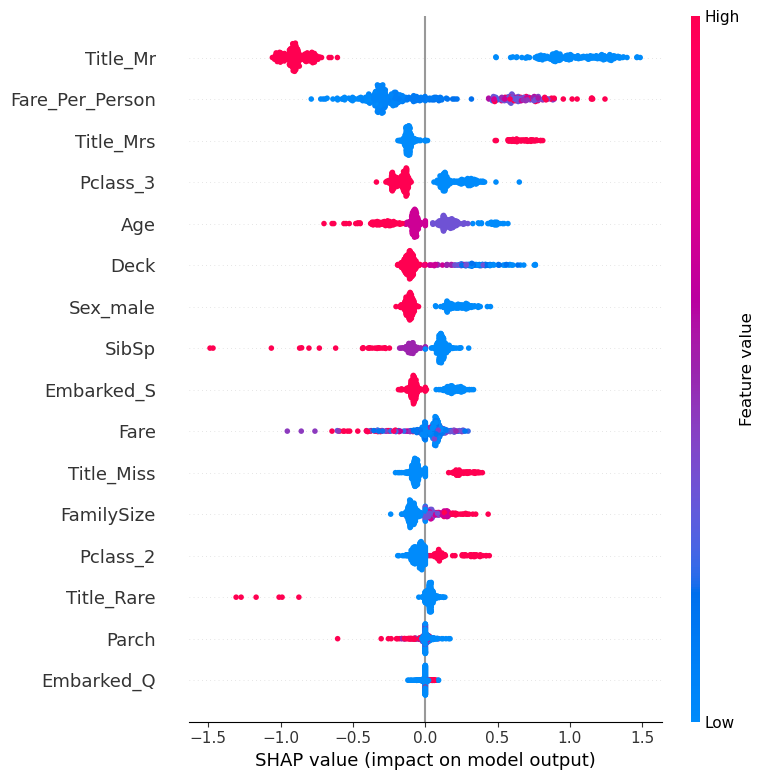

In [919]:
explainer = shap.KernelExplainer(final_model.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)  
shap.summary_plot(shap_values[1], X_test)

In [408]:
submission = pd.DataFrame({
        "PassengerId": pd.read_csv('test.csv')['PassengerId'],
        "Survived": y_pred
    })
submission.to_csv('submission_xgb.csv', index=False)

In [406]:
y_pred =  final_model.predict(X_test)

In [286]:
print(accuracy_score(y_test, models[6][1].predict(x_test)))
print(log_loss(y_test, models[6][1].predict_proba(x_test)[:, 1]))

0.8325358851674641
0.4173003927154396


In [407]:
print(accuracy_score(Y_test,y_pred))
print(f1_score(Y_test, y_pred))


0.9641148325358851
0.9498327759197324
